In [1176]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np
from datetime import datetime
from datetime import datetime, timezone

In [1177]:
df = pd.read_csv('data_youtube.csv', header = 0)
df

,video_channelId,video_channelTitle,video_channelSubscriber,video_id,video_title,video_publishedAt,video_description,video_thumbnails,video_tags,video_categoryId,video_viewCount,video_likeCount,video_commentCount,video_duration_teaser,video_id_mv_official,video_title_mv_official,video_publishedAt_mv_official,video_duration_mv_official,video_viewCount_mv_official,total_hour_mv_published
0,UCayQxFAoFCvGariuQCtHRGQ,WINNER,4000000,QKgGAvlnjMk,WINNER - ‘I LOVE U’ M/V TEASER,2022-06-29 15:00:14+00:00,#WINNER #위너 #4thMINIALBUM #HOLIDAY #TITLE #ILO...,https://i.ytimg.com/vi/QKgGAvlnjMk/default.jpg,"['YG Entertainment', 'YG', '와이지', 'K-pop', 'WI...",10,367167.0,50097.0,2851.0,PT33S,waMAVn2hHBM,WINNER - ‘I LOVE U’ M/V,2022-07-05 09:00:12+00:00,PT3M11S,20183157.0,183114.0
1,UCayQxFAoFCvGariuQCtHRGQ,WINNER,4000000,Z4Byo3MYksk,강승윤 (KANG SEUNG YOON) - 'BORN TO LOVE YOU’ M/V...,2022-03-10 15:00:30+00:00,#강승윤 #KANGSEUNGYOON #4thDIGITALSINGLE #TITLE #...,https://i.ytimg.com/vi/Z4Byo3MYksk/default.jpg,"['YG Entertainment', 'YG', '와이지', 'K-pop', 'WI...",10,308602.0,59197.0,1962.0,PT48S,9mrlCwoOQtQ,강승윤 (KANG SEUNG YOON) - 'BORN TO LOVE YOU' M/V,2022-03-14 09:00:31+00:00,PT3M1S,11893873.0,342954.0
2,UCayQxFAoFCvGariuQCtHRGQ,WINNER,4000000,o_gRFsCEor8,MINO - '탕!♡ (TANG!♡)' M/V TEASER,2021-12-02 15:00:25+00:00,#MINO #송민호 #WINNER #위너 #3rdFULLALBUM #TO_INFIN...,https://i.ytimg.com/vi/o_gRFsCEor8/default.jpg,"['YG Entertainment', 'YG', '와이지', 'K-pop', 'WI...",10,475458.0,40450.0,1477.0,PT22S,VAEEblk-qDU,MINO - '탕!♡ (TANG!♡)' M/V,2021-12-07 09:00:13+00:00,PT3M16S,15466201.0,484074.0
3,UCayQxFAoFCvGariuQCtHRGQ,WINNER,4000000,jMHFF6EaOr0,강승윤(KANG SEUNG YOON) - '아이야 (IYAH)' M/V TEASER #2,2021-03-27 15:00:26+00:00,#강승윤 #KANGSEUNGYOON #1stFULLALBUM #PAGE #TITLE...,https://i.ytimg.com/vi/jMHFF6EaOr0/default.jpg,"['YG Entertainment', 'YG', '와이지', 'K-pop', 'WI...",10,127774.0,23668.0,1707.0,PT46S,-HVfBljdSWE,강승윤(KANG SEUNG YOON) - '아이야 (IYAH)' M/V,2021-03-29 09:00:00+00:00,PT4M15S,12810686.0,844074.0
4,UCayQxFAoFCvGariuQCtHRGQ,WINNER,4000000,7nlDbatnlxo,강승윤(KANG SEUNG YOON) - '아이야 (IYAH)' M/V TEASER,2021-03-25 15:00:03+00:00,#강승윤 #KANGSEUNGYOON #1stFULLALBUM #PAGE #TITLE...,https://i.ytimg.com/vi/7nlDbatnlxo/default.jpg,"['YG Entertainment', 'YG', '와이지', 'K-pop', 'WI...",10,194458.0,37255.0,2731.0,PT28S,-HVfBljdSWE,강승윤(KANG SEUNG YOON) - '아이야 (IYAH)' M/V,2021-03-29 09:00:00+00:00,PT4M15S,12810686.0,846955.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,25900000,3dp7NXoNQGg,"TWICE ""LIKEY"" M/V TEASER 1",2017-10-27 15:00:08+00:00,"TWICE(트와이스) ""LIKEY"" M/V TEASER 1\n\nFind The 1...",https://i.ytimg.com/vi/3dp7NXoNQGg/default.jpg,"['TWICE LIKEY', 'TWICE 라이키', '트와이스 LIKEY', '트와...",10,2442901.0,96504.0,4011.0,PT27S,V2hlQkVJZhE,"TWICE ""LIKEY"" M/V",2017-10-30 09:00:08+00:00,PT3M42S,584159599.0,2639755.0
840,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,25900000,ov1k3qhBhqg,"GOT7 ""You Are"" M/V Teaser",2017-10-06 15:00:00+00:00,"GOT7 ""You Are"" M/V Teaser\n\nFind GOT7 ""7 for ...",https://i.ytimg.com/vi/ov1k3qhBhqg/default.jpg,"['GOT7', '갓세븐', 'GOT7 JB', 'GOT7 잭슨', 'GOT7 진영...",10,1798018.0,175427.0,9261.0,PT45S,ktc8XDBq93k,"GOT7 ""You Are” M/V",2017-10-10 02:59:42+00:00,PT3M31S,98350973.0,2669995.0
841,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,25900000,gCCxjhihsoA,"TWICE ""SIGNAL"" M/V TEASER",2017-05-12 15:00:01+00:00,"TWICE ""SIGNAL"" M/V TEASER\n\nTWICE\nSIGNAL\n20...",https://i.ytimg.com/vi/gCCxjhihsoA/default.jpg,"['TWICE SIGNAL', '트와이스 SIGNAL', '트와이스 시그널', 'T...",10,3175440.0,95154.0,6224.0,PT29S,VQtonf1fv_s,"TWICE ""SIGNAL"" M/V",2017-05-15 09:00:01+00:00,PT4M19S,307425501.0,2881675.0
842,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,25900000,xe9UVM4yfhE,"TWICE ""CHEER UP"" M/V TEASER 2",2016-04-22 15:59:54+00:00,"TWICE(트와이스) ""CHEER UP"" M/V TEASER 2\n\nFind TW...",https://i.ytimg.com/vi/xe9UVM4yfhE/default.jpg,"['TWICE CHEER UP', 'TWICE 치얼업', '트와이스 치얼업', '트...",10,1097360.0,

In [1178]:
df['video_publishedAt']  = pd.to_datetime(df['video_publishedAt'])
df['video_publishedAt_mv_official']  = pd.to_datetime(df['video_publishedAt_mv_official'])

In [1179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   video_channelId                844 non-null    object             
 1   video_channelTitle             844 non-null    object             
 2   video_channelSubscriber        844 non-null    int64              
 3   video_id                       844 non-null    object             
 4   video_title                    844 non-null    object             
 5   video_publishedAt              844 non-null    datetime64[ns, UTC]
 6   video_description              843 non-null    object             
 7   video_thumbnails               844 non-null    object             
 8   video_tags                     783 non-null    object             
 9   video_categoryId               844 non-null    int64              
 10  video_viewCount           

In [1180]:
# độ dài video (tính bằng giây)
def convert_duration_to_seconds(duration):
    x = re.findall("\d+", duration)
    seconds = 0
    if len(x)== 1:
        seconds = int(x[0])
    elif len(x)== 2:
        seconds = int(x[0])*60+int(x[1])
    return seconds

In [1181]:
def get_seconds_video(df1, column):
    total_second = []
    column_list = list(df1[column])
    for value in column_list:
        if isinstance(value,str):
            total_second.append(convert_duration_to_seconds(value))
        else:
            total_second.append(np.nan)
    return total_second

In [1182]:
# chuyển tags dạng string sang list
def convert_tags_to_list(string_tag):
    list_tag= re.sub('\\[|\\]','',string_tag).split(',')
    return list_tag

In [1183]:
# tính len tags
def len_tags_teaser(df1):
    no_tags = []
    list_tags_teaser = list(df1['video_tags'])
    for list_tag in list_tags_teaser:
       
        if isinstance(list_tag,str):
            no_tags.append(len(convert_tags_to_list(list_tag)))
        else:
            no_tags.append(np.nan)
    return no_tags

In [1184]:
# tính len của các gia trị có dạng string trong 1 cột
def len_feature_teaser(df1, column):
    len_features = []
    feature_teaser = list(df1[column])

    for value in feature_teaser :
        if isinstance(value,str):
            len_features.append(len(value))
        else:
            len_features.append(np.nan)
    return len_features

In [1185]:
def total_hour_mv_teaser_publish(df1):
    list_total_seconds = []
    for i in range(df1.shape[0]):
        time_teaser = df1.iloc[i]['video_publishedAt'].to_pydatetime()
        time_mv = df1.iloc[i]['video_publishedAt_mv_official'].to_pydatetime()
        diff = time_mv -time_teaser
        list_total_seconds.append(diff.total_seconds()/60)
    return list_total_seconds

In [1186]:
df_v1 = df.copy()

In [1187]:
df_v1['video_num_tag'] = len_tags_teaser(df_v1)
df_v1['video_title_len'] = len_feature_teaser(df_v1,'video_title')
df_v1['video_description_len'] = len_feature_teaser(df_v1,'video_description')
df_v1['video_teaser_seconds'] = get_seconds_video(df_v1, 'video_duration_teaser')
df_v1['video_mv_seconds'] = get_seconds_video(df_v1, 'video_duration_mv_official')
df_v1['total_hour_mv_teaser_publish'] = total_hour_mv_teaser_publish(df_v1)


In [1188]:
num_pre = ['video_channelSubscriber',
#  'video_categoryId',
 'video_viewCount',
 'video_likeCount',
 'video_commentCount',
 'video_num_tag',
 'video_title_len',
 'video_description_len',
 'video_teaser_seconds',
 'video_mv_seconds',
 'total_hour_mv_teaser_publish',
 'total_hour_mv_published',
 'video_viewCount_mv_official',]

In [1189]:
df_v2 = df_v1[num_pre]

In [1190]:
df_v2

,video_channelSubscriber,video_viewCount,video_likeCount,video_commentCount,video_num_tag,video_title_len,video_description_len,video_teaser_seconds,video_mv_seconds,total_hour_mv_teaser_publish,total_hour_mv_published,video_viewCount_mv_official
0,4000000,367167.0,50097.0,2851.0,16.0,30,87.0,33,191,8279.966667,183114.0,20183157.0
1,4000000,308602.0,59197.0,1962.0,20.0,53,109.0,48,181,5400.016667,342954.0,11893873.0
2,4000000,475458.0,40450.0,1477.0,31.0,32,103.0,22,196,6839.800000,484074.0,15466201.0
3,4000000,127774.0,23668.0,1707.0,20.0,49,99.0,46,255,2519.566667,844074.0,12810686.0
4,4000000,194458.0,37255.0,2731.0,25.0,46,98.0,28,255,5399.950000,846955.0,12810686.0
...,...,...,...,...,...,...,...,...,...,...,...,...
839,25900000,2442901.0,96504.0,4011.0,44.0,26,544.0,27,222,3960.000000,2639755.0,584159599.0
840,25900000,1798018.0,175427.0,9261.0,49.0,25,434.0,45,211,5039.700000,2669995.0,98350973.0
841,25900000,3175440.0,95154.0,6224.0,38.0,25,453.0,29,259,3960.000000,2881675.0,307425501.0
842,25900000,1097360.0,31580.0,1346.0,33.0,29,550.0,20,241,2820.233333,3436015.0,511288632.0


In [1191]:
df_v2.describe()

,video_channelSubscriber,video_viewCount,video_likeCount,video_commentCount,video_num_tag,video_title_len,video_description_len,video_teaser_seconds,video_mv_seconds,total_hour_mv_teaser_publish,total_hour_mv_published,video_viewCount_mv_official
count,8.440000e+02,8.440000e+02,8.410000e+02,8.440000e+02,783.000000,844.000000,843.000000,844.000000,844.000000,8.440000e+02,8.440000e+02,8.440000e+02
mean,3.701730e+07,2.227049e+06,2.337594e+05,1.559027e+04,19.305236,44.227488,638.383155,29.464455,229.889810,1.203311e+04,1.848932e+06,6.069601e+07
std,1.873851e+07,5.979478e+06,5.594165e+05,6.254762e+04,14.305403,13.213922,490.356169,11.368618,71.026591,6.399637e+04,1.455532e+06,1.630770e+08
min,5.450000e+05,2.643000e+04,2.440000e+02,2.300000e+01,2.000000,21.000000,33.000000,1.000000,3.000000,-4.988333e+04,2.350000e+02,1.000000e+00
25%,3.100000e+07,2.743752e+05,2.611600e+04,1.252500e+03,8.000000,34.000000,356.000000,23.000000,204.000000,1.797163e+03,7.291450e+05,2.917100e+06
50%,3.100000e+07,7.750165e+05,7.719700e+04,3.660500e+03,15.000000,42.000000,492.000000,28.000000,223.000000,3.239983e+03,1.573974e+06,1.281746e+07
75%,3.100000e+07,1.907417e+06,2.345610e+05,9.746750e+03,27.000000,52.000000,687.000000,33.000000,248.000000,6.720625e+03,2.636335e+06,4.947544e+07
max,8.270000e+07,7.455863e+07,6.455162e+06,1.120787e+06,75.000000,100.000000,2955.000000,115.000000,815.000000,1.640160e+06,6.929699e+06,1.973649e+09


In [1192]:
df_v2 = df_v2[df_v2['video_viewCount_mv_official']>1]

<AxesSubplot:ylabel='video_viewCount_mv_official'>

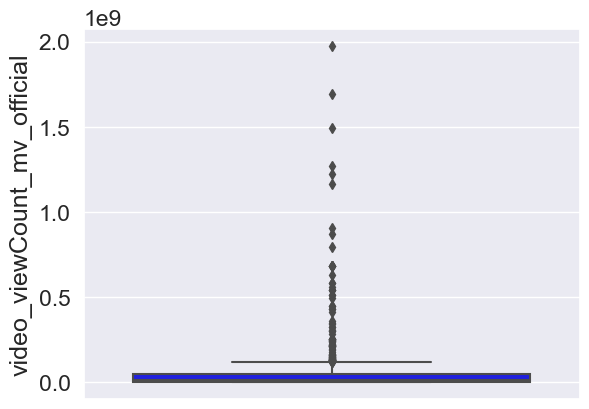

In [1193]:
sns.boxplot(y=df_v2['video_viewCount_mv_official'],color='blue',orient='v')

In [1194]:
# sns.boxplot(y=df_v2[num_pre[11]],color='blue',orient='v')

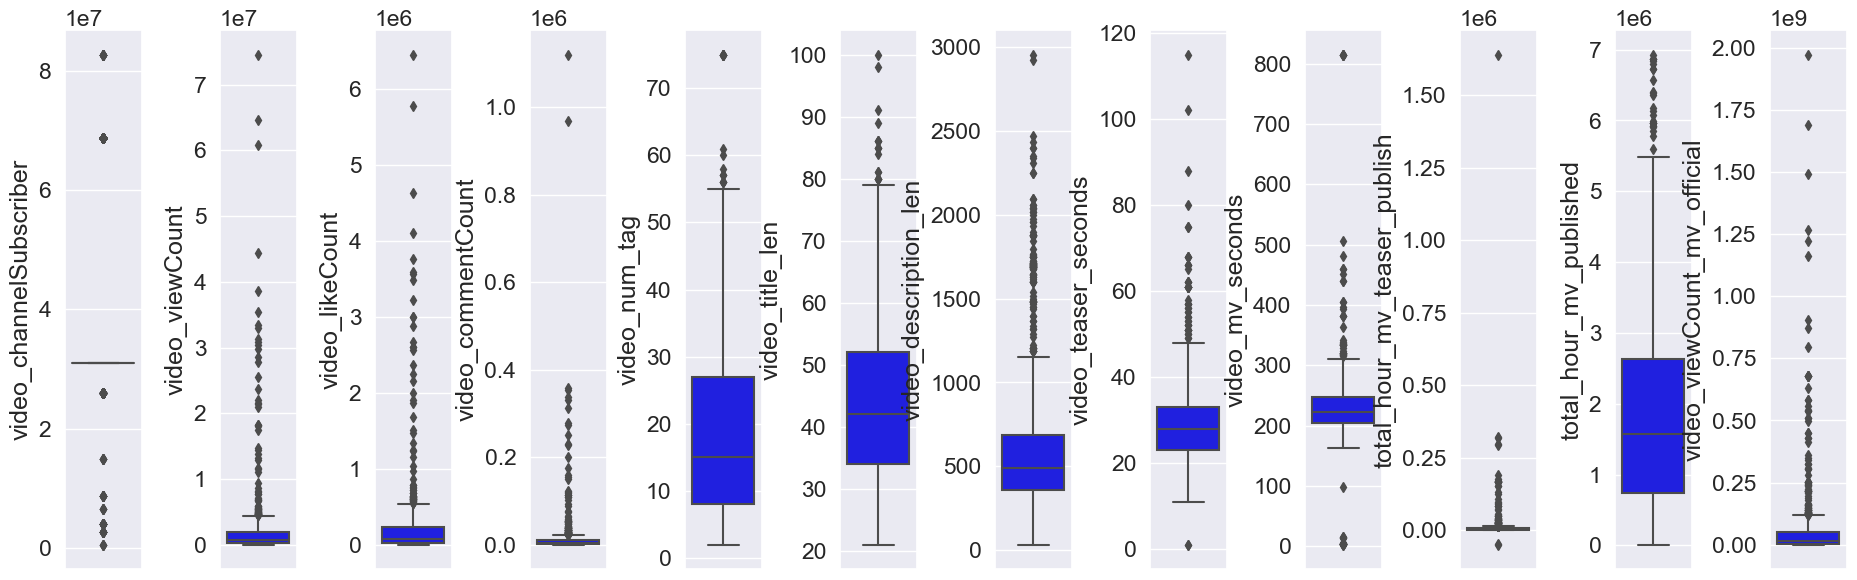

In [1195]:
plt.figure(figsize=(25, 7))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1, hspace=0.5)
for i in range(0, len(num_pre)):
    plt.subplot(1, 13, i+1)
    sns.boxplot(y=df_v2[num_pre[i]],color='blue',orient='v')
    

<AxesSubplot:>

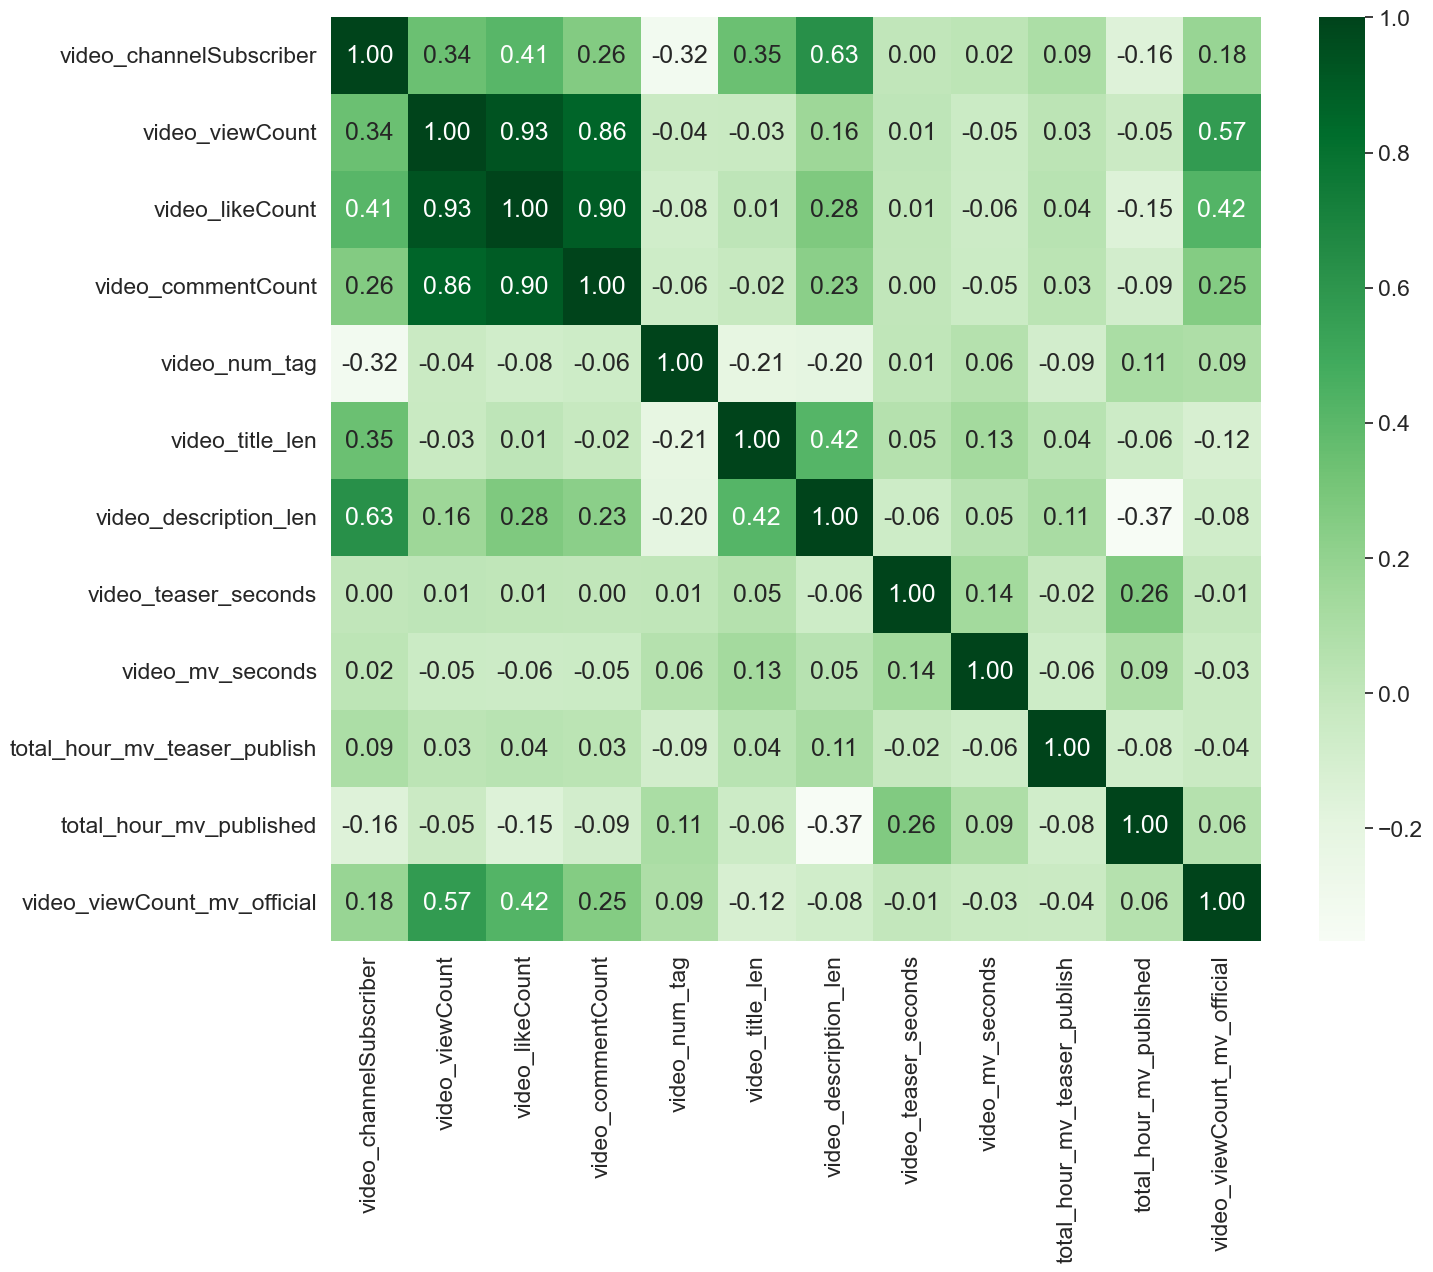

In [1196]:
corr_= df_v2.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap="Greens")

In [1197]:
q25,q75 = np.percentile(a = df_v2['video_viewCount_mv_official'],q=[25,75])
IQR = q75 - q25
lower_limit = q25 - 1.5*IQR
upper_limit = q75 + 1.5*IQR
print(upper_limit)
print(lower_limit)

119565178.25
-67030675.75


In [1198]:
df_v2['video_num_tag'].fillna(df_v2['video_num_tag'].mean(),  inplace=True)
df_v2['video_description_len'].fillna(df_v2['video_description_len'].mean(),  inplace=True)
df_v2['video_likeCount'].fillna(df_v2['video_likeCount'].mean(),  inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_7440\1804666780.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_v2['video_num_tag'].fillna(df_v2['video_num_tag'].mean(),  inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_7440\1804666780.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_v2['video_description_len'].fillna(df_v2['video_description_len'].mean(),  inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_7440\1804666780.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

In [1199]:
df3  = df_v2.copy()


In [1200]:
df3 = df3[(df3['video_viewCount_mv_official']> lower_limit) &(df3['video_viewCount_mv_official']< upper_limit)]

<AxesSubplot:ylabel='video_viewCount_mv_official'>

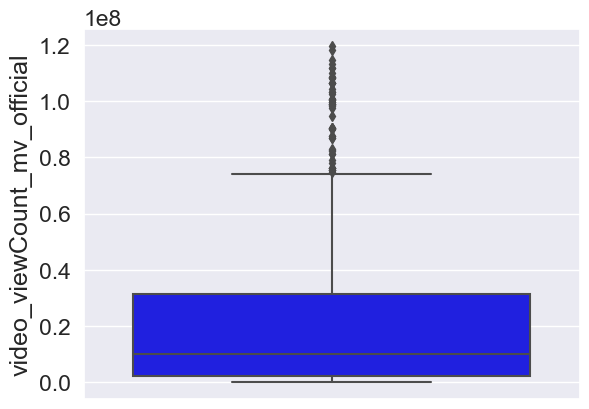

In [1201]:
sns.boxplot(y=df3['video_viewCount_mv_official'],color='blue',orient='v')

In [1202]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [1203]:
df_train, df_test = train_test_split(df3, test_size=0.2, random_state= 43, shuffle= True)
X_train = df_train.copy()
y_train = X_train.pop("video_viewCount_mv_official")

X_test = df_test.copy()
y_test = X_test.pop("video_viewCount_mv_official")

In [1204]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [1205]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def eval_regression(model, pred, xtrain, ytrain, xtest, ytest):
    print("MAE: %.2f" % mean_absolute_error(ytest, pred)) 
    print("MSE: %.2f" % mean_squared_error(ytest, pred, squared=False)) 
    print('R2 score: %.2f' % r2_score(ytest, pred)) 

In [1206]:
# # LINEAR REGRESSION

from sklearn.linear_model import LinearRegression


model = LinearRegression()
model.fit(X_train, y_train)

# predicting the  test set results
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


eval_regression(model, y_pred_test, X_train, y_train, X_test, y_test)

MAE: 18017006.64
MSE: 24026624.49
R2 score: 0.23


In [1207]:
from sklearn.linear_model import Ridge
reg_ridge = Ridge(alpha = 3)
reg_ridge.fit(X_train, y_train)
y_pred = reg_ridge.predict(X_test)
eval_regression(reg_ridge, y_pred, X_train, y_train, X_test, y_test)

MAE: 19336433.45
MSE: 25338264.33
R2 score: 0.15


In [1208]:
from sklearn.linear_model import Lasso


reg_lasso = Lasso(alpha = 3)
reg_lasso.fit(X_train, y_train)

y_pred = reg_lasso.predict(X_test)
eval_regression(reg_lasso, y_pred, X_train, y_train, X_test, y_test)


MAE: 18017055.34
MSE: 24026667.65
R2 score: 0.23


In [1209]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state= 43)
best_model1 = rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
eval_regression(rf, y_pred, X_train, y_train, X_test, y_test)



MAE: 9977564.65
MSE: 15563418.44
R2 score: 0.68


In [1210]:
len(y_pred)

151

In [1218]:
d1 = {'True Labels': y_test, 'Predicted Labels': y_pred}
SK = pd.DataFrame(data = d1)
SK['diff'] = abs(SK['True Labels']- SK['Predicted Labels'])
SK[SK['diff']<1000000].reset_index()


,index,True Labels,Predicted Labels,diff
0,11,14456269.0,14152860.77,303408.23
1,761,1331273.0,2181545.29,850272.29
2,367,224504.0,228107.62,3603.62
3,473,33295151.0,34006467.38,711316.38
4,343,5955487.0,5432514.41,522972.59
5,565,51627515.0,51366958.88,260556.12
6,185,6369309.0,7083654.71,714345.71
7,590,4300538.0,4283916.60,16621.40
8,344,5955487.0,5754031.73,201455.27
9,68,796289.0,686184.52,110104.48


In [1212]:
SK.describe()

,True Labels,Predicted Labels,diff
count,1.510000e+02,1.510000e+02,1.510000e+02
mean,2.014692e+07,2.171811e+07,9.977565e+06
std,2.749811e+07,2.099565e+07,1.198413e+07
min,1.954500e+05,2.228258e+05,3.603620e+03
25%,1.789616e+06,5.160748e+06,1.481636e+06
50%,6.995448e+06,1.531086e+07,6.501045e+06
75%,2.613596e+07,2.934579e+07,1.414945e+07
max,1.195509e+08,8.378936e+07,7.092082e+07


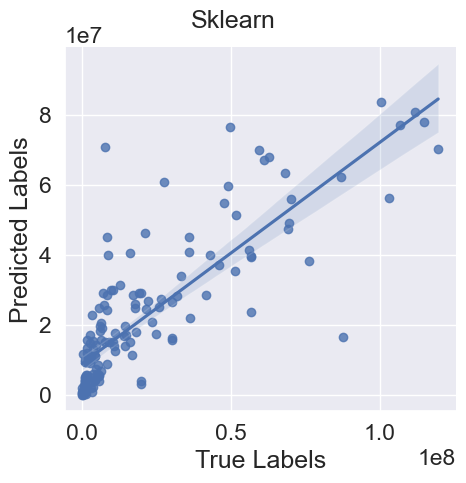

In [1213]:
lm1 = sns.lmplot(x="True Labels", y="Predicted Labels", data = SK[["True Labels",'Predicted Labels']])
fig1 = lm1.fig 
fig1.suptitle("Sklearn", fontsize=18)
sns.set(font_scale = 1.5)